## We know that the Loss Function for Logistic Regression is:

$$
L(f_{\vec{w}, b}(\vec{x}^{(i)}), y^{(i)}) =
\begin{cases}
-\log(f_{\vec{w}, b}(\vec{x}^{(i)})) & \text{if } y^{(i)} = 1 \\
-\log(1 - f_{\vec{w}, b}(\vec{x}^{(i)})) & \text{if } y^{(i)} = 0
\end{cases}
$$

Where, 


$$
f_{\vec{w}, b}(\vec{x}) = \frac{1}{1 + e^{-(w \cdot x + b)}}
$$

## Simplified Cost Function is


$J(\vec w, b) = -\frac{1}{m} \sum_{i=1}^m [y^{(i)} log(f_{\vec{w}, b}(\vec{x}^{(i)})) + (1-y^{(i)}) log(1-f_{\vec{w}, b}(\vec{x}^{(i)}))]$

## Gradient Descent for Logistic Regression is

repeat until convergence {

$ w_j = w_j - \alpha [\frac{1}{m}\sum_{i=1}^{m} (f_{\vec{w}, b}(\vec{x}^{(i)})- y^{(i)}) x_j^{(i)}]$

$b = b - \alpha [\frac{1}{m}\sum_{i=1}^{m} (f_{\vec{w}, b}(\vec{x}^{(i)})- y^{(i)}) ] $







}

# Lab 

In [24]:
import numpy as np
import math
import matplotlib.pyplot as plt

In [25]:
X_train = np.array([[0.5, 1.5], [1,1], [1.5, 0.5], [3, 0.5], [2, 2], [1, 2.5]])  #(m,n)
y_train = np.array([0, 0, 0, 1, 1, 1])  

In [26]:
def sigmoid(z):
    g = 1/(1+np.exp(-z))

    return g

In [27]:
def compute_cost_logistic(X, y, w, b):
    """
    Computes cost for gradient descent

    Args:
      X (ndarray (m,n)): Data, m examples with n features
      y (ndarray (m,)) : target values
      w (ndarray (n,)) : model parameters  
      b (scalar)       : model parameter
      
    Returns:
      cost (scalar): cost

    """
    m = X.shape[0]
    cost = 0.0
    for i in range(m):
        z_i = np.dot(X[i], w) + b
        f_wb_i = sigmoid(z_i)

        cost += -y[i] * np.log(f_wb_i) - (1-y[i]) * np.log(1-f_wb_i)

    cost = cost/m
    return cost

In [28]:
def compute_gradient_logistic(X, y, w, b):
    m,n = X.shape
    dw = np.zeros((n,))
    db = 0.0
    for i in range(m):
        f_wb_i = 1/(1+np.exp(-(np.dot(X[i], w) + b)))
        err = f_wb_i - y[i]
        for j in range(n):
            dw[j] += err * X[i,j]
        db += err
    dw = dw/m
    db = db/m

    return dw, db
    

In [29]:
X_tmp = np.array([[0.5, 1.5], [1,1], [1.5, 0.5], [3, 0.5], [2, 2], [1, 2.5]])
y_tmp = np.array([0, 0, 0, 1, 1, 1])
w_tmp = np.array([2.,3.])
b_tmp = 1.
dj_db_tmp, dj_dw_tmp = compute_gradient_logistic(X_tmp, y_tmp, w_tmp, b_tmp)
print(f"dj_db: {dj_db_tmp}" )
print(f"dj_dw: {dj_dw_tmp.tolist()}" )

dj_db: [0.49833339 0.49883943]
dj_dw: 0.49861806546328574


In [32]:
def gradient_descent(X,y, w_in, b_in, alpha, num_iters):
    cost_history = []
    w = w_in
    b = b_in

    for i in range(num_iters):
        # calculate the gradients for $\vec w$ and $b$
        dw, db = compute_gradient_logistic(X, y, w, b)

        w = w - alpha * dw
        b = b - alpha * db

        # Save cost J at each iteration
        if i<100000:      # prevent resource exhaustion 
            cost_history.append( compute_cost_logistic(X, y, w, b) )

        # Print cost every at intervals 10 times or as many iterations if < 10
        if i% math.ceil(num_iters / 10) == 0:
            print(f"Iteration {i:4d}: Cost {cost_history[-1]}   ")
        
    return w, b, cost_history         #return final w,b and J history for graphing

        



In [36]:
w_tmp  = np.zeros_like(X_train[0])
b_tmp  = 0.
alph = 0.1
iters = 100000

w_out, b_out, _ = gradient_descent(X_train, y_train, w_tmp, b_tmp, alph, iters) 
print(f"\nupdated parameters: w:{w_out}, b:{b_out}")

Iteration    0: Cost 0.684610468560574   
Iteration 10000: Cost 0.01711604647887364   
Iteration 20000: Cost 0.008523403979166467   
Iteration 30000: Cost 0.005672197191107633   
Iteration 40000: Cost 0.004250161053834308   
Iteration 50000: Cost 0.003398230224179212   
Iteration 60000: Cost 0.0028308425601004327   
Iteration 70000: Cost 0.002425848306579758   
Iteration 80000: Cost 0.0021222573122028584   
Iteration 90000: Cost 0.0018862216652143864   

updated parameters: w:[8.35313087 8.15226727], b:-22.690605796630248


In [41]:
x0 = X_train[:, 0]
x1 = X_train[:, 1]

In [48]:
x0p = -b_out/w_out[0]
x1p = -b_out/w_out[1]



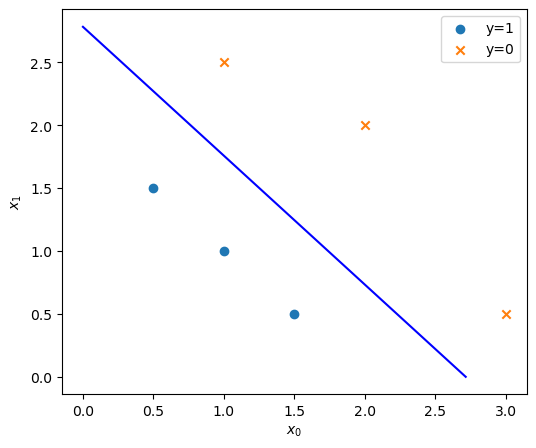

In [50]:
fig, ax = plt.subplots(figsize=(6,5))
ax.scatter(x0[:3], x1[:3], marker='o', label="y=1")
ax.scatter(x0[3::], x1[3:], marker='x', label="y=0")

ax.plot([0,x0p], [x1p,0], c='b')


ax.set_xlabel("$x_0$")
ax.set_ylabel("$x_1$")

ax.legend()

## Using Sklearn

In [51]:
from sklearn.linear_model import LogisticRegression

lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)

LogisticRegression()

In [53]:
y_pred = lr_model.predict(X_train)

In [54]:
y_pred

array([0, 0, 0, 1, 1, 1])

In [56]:
print("Accuracy on training set:", lr_model.score(X_train, y_train))

Accuracy on training set: 1.0
